In [70]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

# Bring in files and load into dataframe

In [71]:
states = input("Enter state: ")
states = states.lower()

Enter state: arizona


In [72]:
path = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID_19/{states}_data/{states}_master_file.csv"

In [73]:
master_df = pd.read_csv(path)
master_df = master_df[master_df.County != 'Unassigned']

# Format dataframe

In [74]:
import datetime as dt
master_df['Date'] = master_df['Date'].apply(pd.to_datetime)
master_df['Date'] = master_df['Date'].dt.strftime('%m/%d/%Y')

In [75]:
master_df.sort_values(by=['County','Date'], inplace=True)
master_df = master_df.drop(columns=['FIPS', 'State','Country','lat','lon','Active','Combined_Key'])
master_df = master_df.drop(columns=['Confirmed.1'])
master_df = master_df.dropna()

# Pivot dataframe for confirmed cases

In [76]:
try:
    master_df_confirmed = master_df.pivot(index=master_df.columns[0],
                  columns=master_df.columns[1],
                  values= master_df.columns[2])
except:
    master_df_confirmed = master_df.pivot_table(index='County', columns='Date', values='Confirmed')
dates_confirmed = list(master_df_confirmed.columns)
master_df_confirmed = master_df_confirmed.sort_values(by=dates_confirmed[-1], ascending=False)
master_df_confirmed = master_df_confirmed.dropna()
master_df_confirmed=master_df_confirmed[master_df_confirmed[dates_confirmed[-1]]!=0].dropna()
master_df_confirmed

Date,03/22/2020,03/23/2020,03/24/2020,03/25/2020,03/26/2020,03/27/2020
County,,,,,,
Maricopa,81,139,199,251,299,399
Pima,17,24,42,49,75,102
Navajo,13,25,32,37,43,49
Coconino,14,17,18,23,28,41
Pinal,16,17,22,23,35,36
Apache,3,4,4,7,9,11
Yavapai,3,3,3,4,5,9
Graham,2,2,2,2,2,4
Mohave,0,0,0,0,2,4


# Matplotlib for confirmed cases

In [77]:
filter_list = master_df_confirmed[dates_confirmed[-1]]
li_1 = []
li_200 = []
li_50 = []
li_min = []
li_zero = []
count = 0
for i in filter_list:
    if i == 0:
        li_zero.append(master_df_confirmed.iloc[count])
    elif i <= 10:
        li_min.append(master_df_confirmed.iloc[count])
    elif i <= 50:
        li_50.append(master_df_confirmed.iloc[count])
    elif i <= 200:
        li_200.append(master_df_confirmed.iloc[count])
    else:
        li_1.append(master_df_confirmed.iloc[count])
    
        
    count+=1

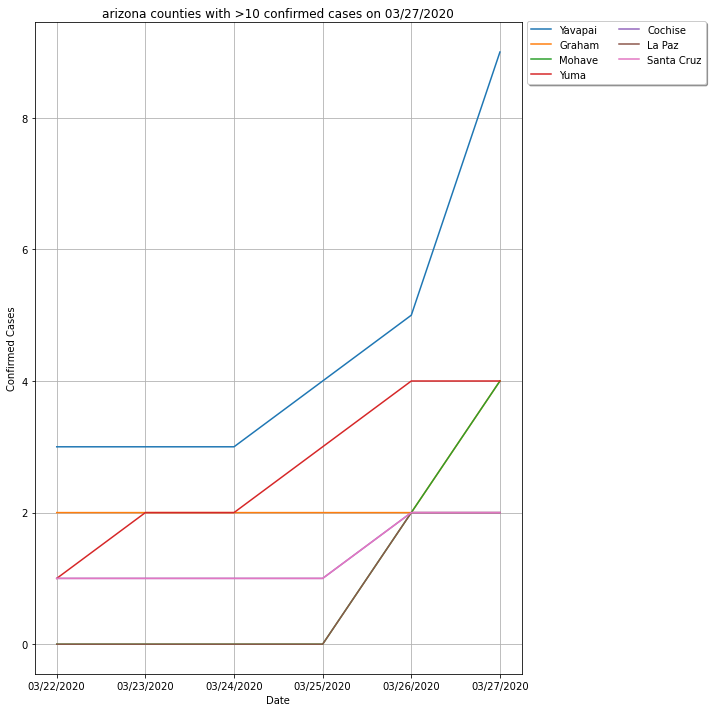

In [78]:
plt.figure(figsize=(10,10))
for i in li_min:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_confirmed_fig_1.png',dpi=200)

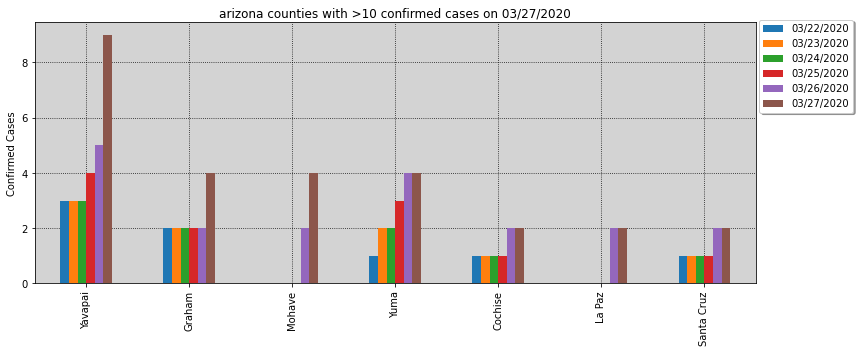

In [79]:
li_min_df = pd.DataFrame(li_min)
neww = li_min_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_bar_confirmed1.png',dpi=200)
plt.show()

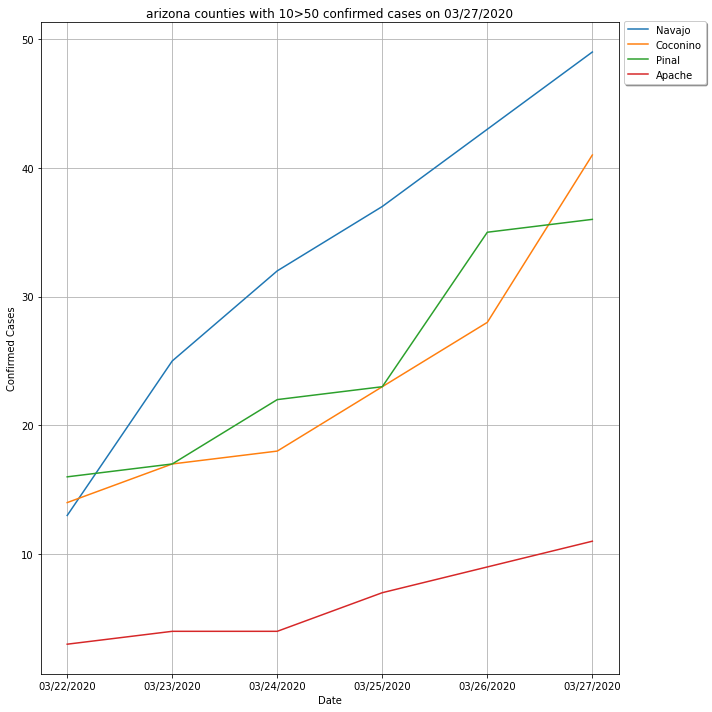

In [80]:
plt.figure(figsize=(10,10))
for i in li_50:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_confirmed_fig_2.png',dpi=200)

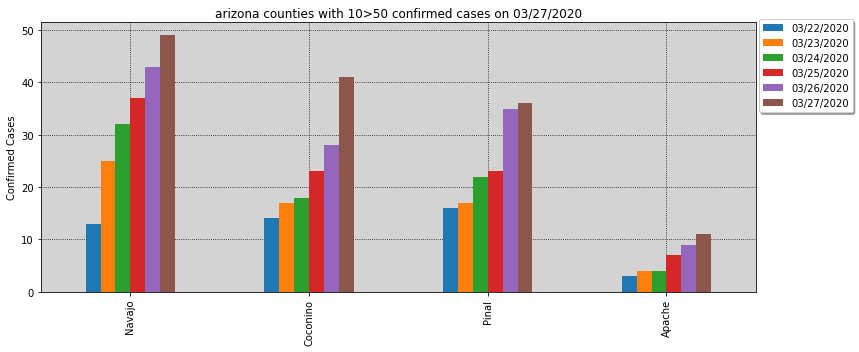

In [81]:
li_50_df = pd.DataFrame(li_50)
neww = li_50_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_bar_confirmed2.png',dpi=200)
plt.show()

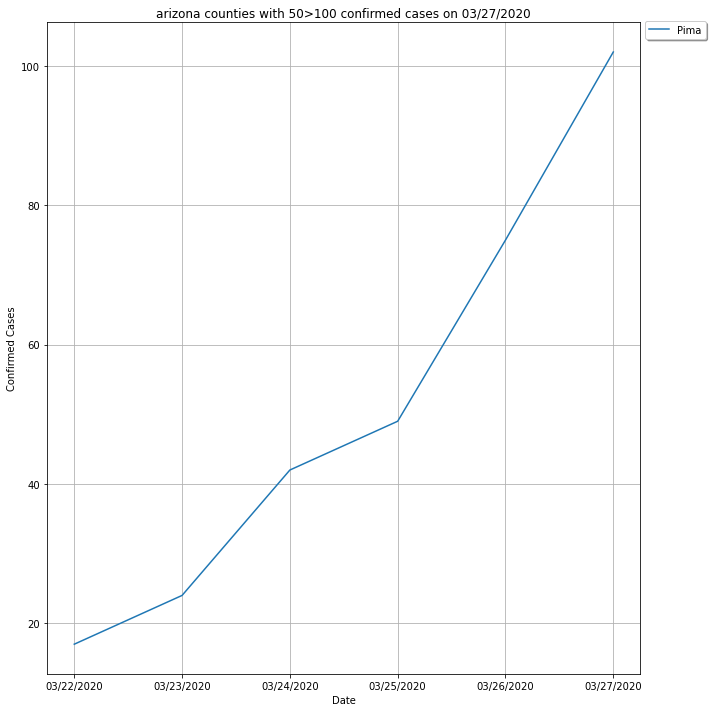

In [82]:
plt.figure(figsize=(10,10))
for i in li_200:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 50>100 confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_confirmed_fig_3.png',dpi=200)

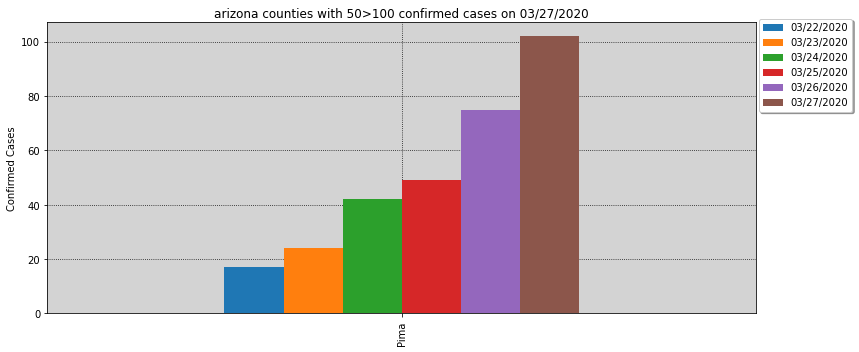

In [83]:
li_200_df = pd.DataFrame(li_200)
neww = li_200_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 50>100 confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_bar_confirmed3.png',dpi=200)
plt.show()

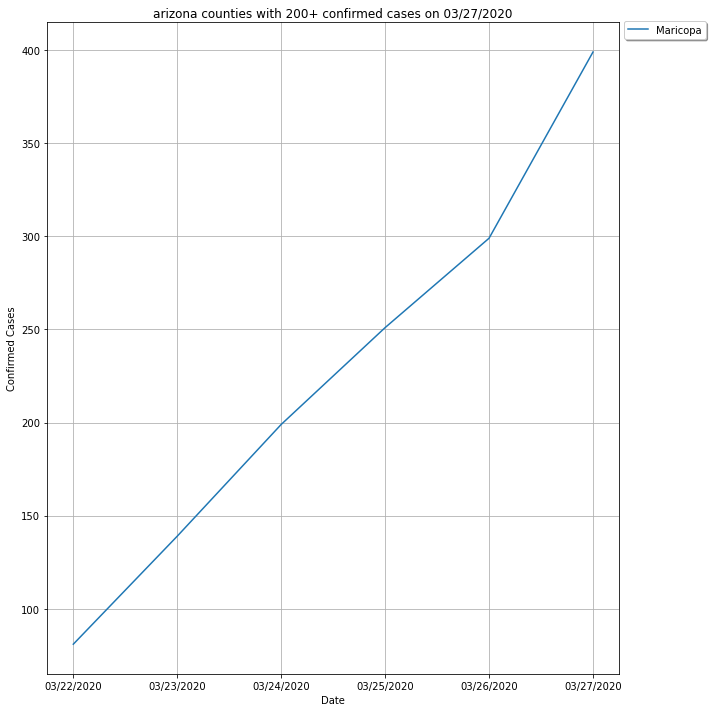

In [84]:
plt.figure(figsize=(10,10))
for i in li_1:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 200+ confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_confirmed_fig_4.png',dpi=200)

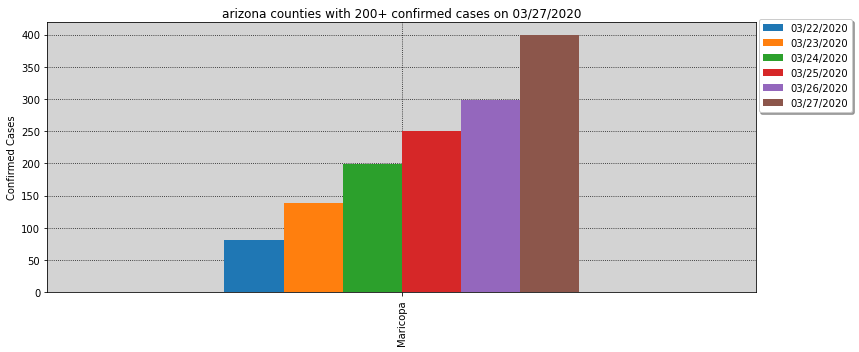

In [85]:
li_1_df = pd.DataFrame(li_1)
neww = li_1_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 200+ confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_bar_confirmed4.png',dpi=200)
plt.show()

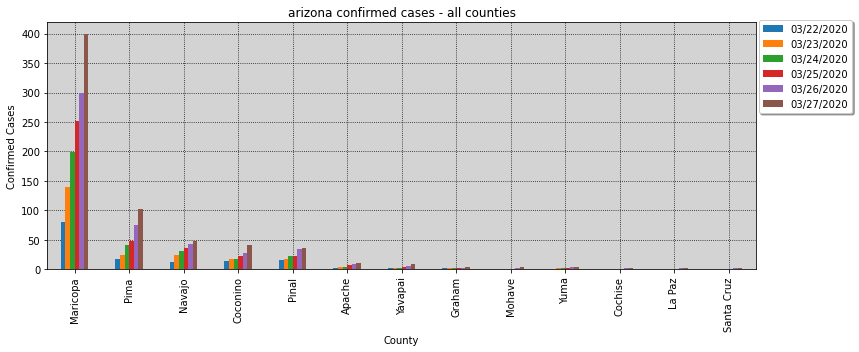

In [86]:
neww = master_df_confirmed.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} confirmed cases - all counties")
plt.tight_layout()
plt.savefig(f'{states}_data/{states}_bar_confirmed.png',dpi=200)
plt.show()